# BIVARIATE PLOTTING WITH PANDAS

In [3]:
#IMPORT LIBRARY
from IPython.display import Image
import pandas as pd

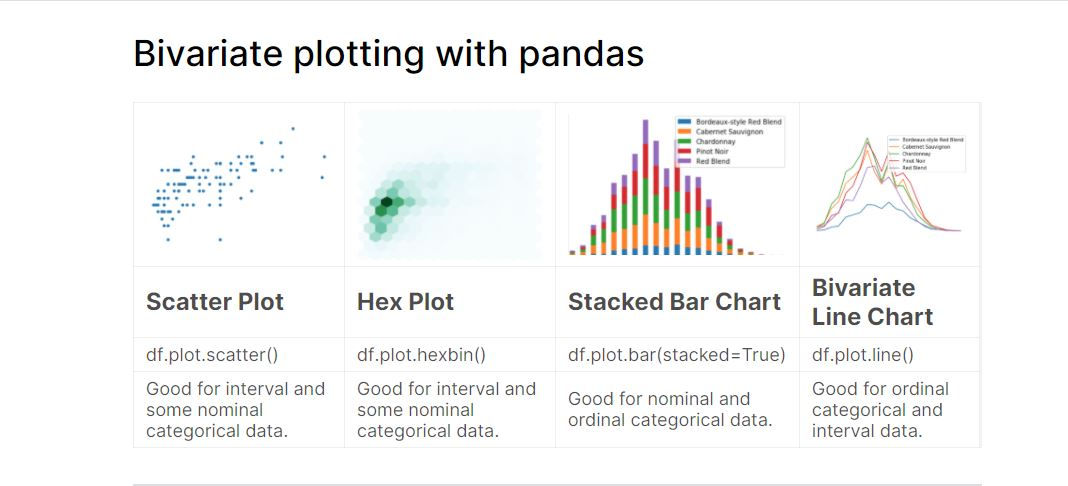

In [5]:
# Load image from local storage
Image(filename = "bivariate.JPG", width = 1100, height = 300)

In the previous notebook, we explored using pandas to plot and understand relationships within a single column. In this notebook, we'll expand this view by looking at plots that consider two variables at a time.

Data without relationships between variables is the data science equivalent of a blank canvas. To paint the picture in, we need to understand how variables interact with one another. Does an increase in one variable correlate with an increase in another? Does it relate to a decrease somewhere else? The best way to paint the picture in is by using plots that enable these possibilities.

In [6]:
reviews = pd.read_csv('winepeg.csv')
reviews.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### Scatter plot

The simplest bivariate plot is the lowly scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space. This is the result:

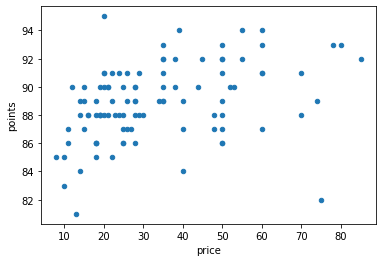

In [10]:
reviews[reviews['price']<100].sample(100).plot.scatter(x='price', y='points')

This plot shows us that price and points are weakly correlated: that is, that more expensive wines do generally earn more points when reviewed.

Note that in order to make effective use of this plot, we had to downsample our data, taking just 100 points from the full set. This is because naive scatter plots do not effectively treat points which map to the same place. For example, if two wines, both costing 100 dollars, get a rating of 90, then the second one is overplotted onto the first one, and we add just one point to the plot.

This isn't a problem if it happens just a few times. But with enough points the distribution starts to look like a shapeless blob, and you lose the forest for the trees:

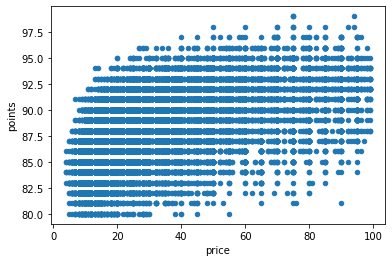

In [13]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

Because of their weakness to overplotting, scatter plots work best with relatively small datasets, and with variables which have a large number of unique values.

There are a few ways to deal with overplotting. We've already demonstrated one way: sampling the points. Another interesting way to do this that's built right into pandas is to use our next plot type, a hexplot.

### Hexplot

A hex plot aggregates points in space into hexagons, and then colors those hexagons based on the values within them:

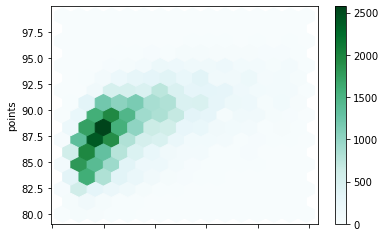

In [16]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

(note: the x-axis is points, but is missing from the chart due to a bug)

The data in this plot is directly comparable with that in the scatter plot from earlier, but the story it tells us is very different. From this hexplot we can see that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

We did not see this effect by looking at the scatter plot, because too many similarly-priced, similarly-scoring wines were overplotted. By doing away with this problem, this hexplot presents us a much more useful view of the dataset.

Hexplots and scatter plots can by applied to combinations of interval variables and/or ordinal categorical variables.



In [24]:
wine_count = pd.read_csv('top-five-wine-score-counts.csv',
                          index_col=0)
wine_count.head(10)

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0
85,310.0,1048.0,1244.0,873.0,587.0
86,354.0,1194.0,1472.0,1218.0,871.0
87,510.0,1566.0,1809.0,1726.0,1233.0
88,498.0,1141.0,1416.0,1474.0,1260.0


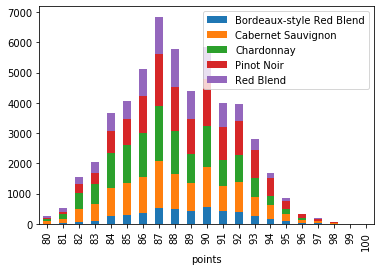

In [25]:
wine_count.plot.bar(stacked=True)

Stacked bar plots share the strengths and weaknesses of univariate bar charts. They work best for nominal categorical or small ordinal categorical variables.

Another simple example is the area plot, which lends itself very naturally to this form of manipulation:

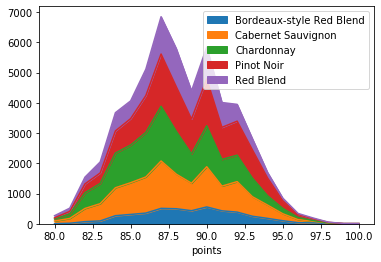

In [29]:
wine_count.plot.area()

Like single-variable area charts, multivariate area charts are meant for nominal categorical or interval variables.

Stacked plots are visually very pretty. However, they have two major limitations.

The first limitation is that the second variable in a stacked plot must be a variable with a very limited number of possible values (probably an ordinal categorical, as here). Five different types of wine is a good number because it keeps the result interpretable; eight is sometimes mentioned as a suggested upper bound. Many dataset fields will not fit this critereon naturally, so you have to "make do", as here, by selecting a group of interest.

The second limitation is one of interpretability. As easy as they are to make, and as pretty as they look, stacked plots make it really hard to distinguish concrete values. For example, looking at the plots above, can you tell which wine got a score of 87 more often: Red Blends (in purple), Pinot Noir (in red), or Chardonnay (in green)? It's actually really hard to tell!

### Bivariate line chart
One plot type we've seen already that remains highly effective when made bivariate is the line chart. Because the line in this chart takes up so little visual space, it's really easy and effective to overplot multiple lines on the same chart.

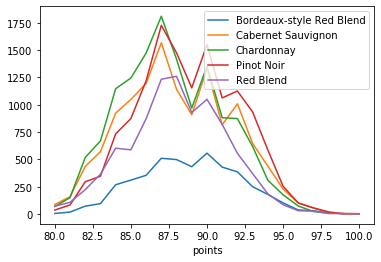

In [30]:
wine_count.plot.line()

Using a line chart this way makes inroads against the second limitation of stacked plotting: interpretability. Bivariate line charts are much more interpretable because the lines themselves don't take up much space. Their values remain readable when we place multiple lines side-by-side, as here.

For example, in this chart we can easily answer our question from the previous example: which wine most commonly scores an 87. We can see here that the Chardonnay, in green, narrowly beats out the Pinot Noir, in red.

## EXCERCISE

In [32]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


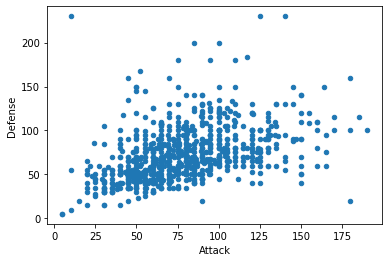

In [33]:
pokemon.plot.scatter(x='Attack', y='Defense')

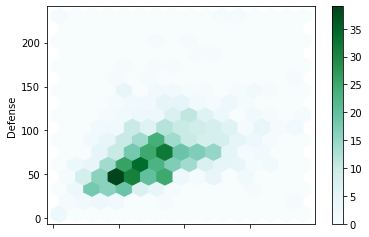

In [34]:
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=15)

In [35]:
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]

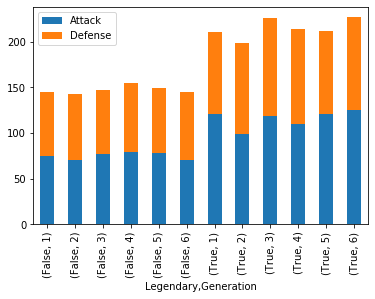

In [36]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [37]:
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

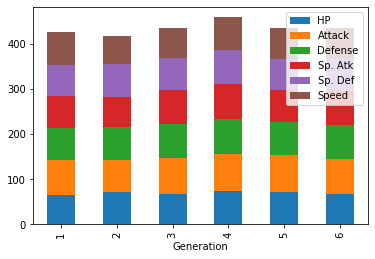

In [38]:
pokemon_stats_by_generation.plot.bar(stacked=True)

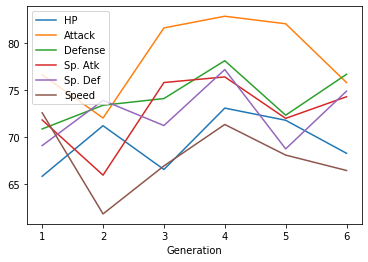

In [39]:
pokemon_stats_by_generation.plot.line()